In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

In [11]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [12]:
class MyNetwork(nn.Module):

    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(MyNetwork, self).__init__()
        ###all learnable parameters
        self.layer1 = nn.Linear(input_dim, hidden_dim1)
        self.layer2 = nn.Linear(hidden_dim1, hidden_dim2) #We can see the o/p of 1st layer being the i/p of 2nd layer
        self.layer3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.output_layer = nn.Linear(hidden_dim3, output_dim)  #Here in doing the addition, both the inputs fed should have same size
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        #####

    def forward(self, x): #x can be of multiple ips, x1, x2

        x = x.view(-1, 28*28)  #Flatten the data
        # First layer
        out1 = self.relu(self.layer1(x))   #output of layer 1 is fed to relu

        # Second layer
        out2 = self.relu(self.layer2(out1))

        # Third layer
        out3 = self.relu(self.layer3(out2))

        # Concatenate outputs of the 1st and 3rd layers
        #concatenated_output = torch.cat((out1, out3), dim=1)

        # Output layer
        output = self.softmax(self.output_layer(out3))

        return output

In [13]:
def train_model(model, train_dataloader, test_dataloader, criterion, optimizer, num_epochs, device):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []


    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Calculate average loss and accuracy for training
        train_loss = running_loss / len(train_dataloader)
        train_accuracy = correct / total

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Evaluate the model on the validation dataset
        val_loss, val_accuracy = evaluate_model(model, test_dataloader, criterion, device)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy * 100:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy * 100:.2f}%')

    print('Training complete.')
    return train_losses, train_accuracies, val_losses, val_accuracies



In [14]:
def evaluate_model(model, dataloader, criterion, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    total_loss = 0.0


    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()


    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total

    return avg_loss, accuracy


In [15]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [17]:
input_dim = 784
hidden_dim1 = 500
hidden_dim2 = 250
hidden_dim3 = 100
output_dim = 10
batch_size = 64
learning_rate = 0.001
num_epochs = 15

# Initialize the model, criterion, and optimizer
model = MyNetwork(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Create DataLoader for train and test datasets
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Train and evaluate the model
train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_dataloader, test_dataloader, criterion, optimizer, num_epochs, device)

Epoch [1/15], Train Loss: 1.5867, Train Accuracy: 88.28%, Val Loss: 1.5307, Val Accuracy: 93.25%
Epoch [2/15], Train Loss: 1.5154, Train Accuracy: 94.67%, Val Loss: 1.5132, Val Accuracy: 94.84%
Epoch [3/15], Train Loss: 1.5032, Train Accuracy: 95.88%, Val Loss: 1.5064, Val Accuracy: 95.49%
Epoch [4/15], Train Loss: 1.4976, Train Accuracy: 96.38%, Val Loss: 1.4983, Val Accuracy: 96.29%
Epoch [5/15], Train Loss: 1.4936, Train Accuracy: 96.76%, Val Loss: 1.4969, Val Accuracy: 96.47%
Epoch [6/15], Train Loss: 1.4911, Train Accuracy: 97.03%, Val Loss: 1.4964, Val Accuracy: 96.45%
Epoch [7/15], Train Loss: 1.4896, Train Accuracy: 97.15%, Val Loss: 1.4926, Val Accuracy: 96.84%
Epoch [8/15], Train Loss: 1.4880, Train Accuracy: 97.33%, Val Loss: 1.4979, Val Accuracy: 96.33%
Epoch [9/15], Train Loss: 1.4874, Train Accuracy: 97.38%, Val Loss: 1.4928, Val Accuracy: 96.79%
Epoch [10/15], Train Loss: 1.4865, Train Accuracy: 97.45%, Val Loss: 1.4890, Val Accuracy: 97.19%
Epoch [11/15], Train Loss: 1.

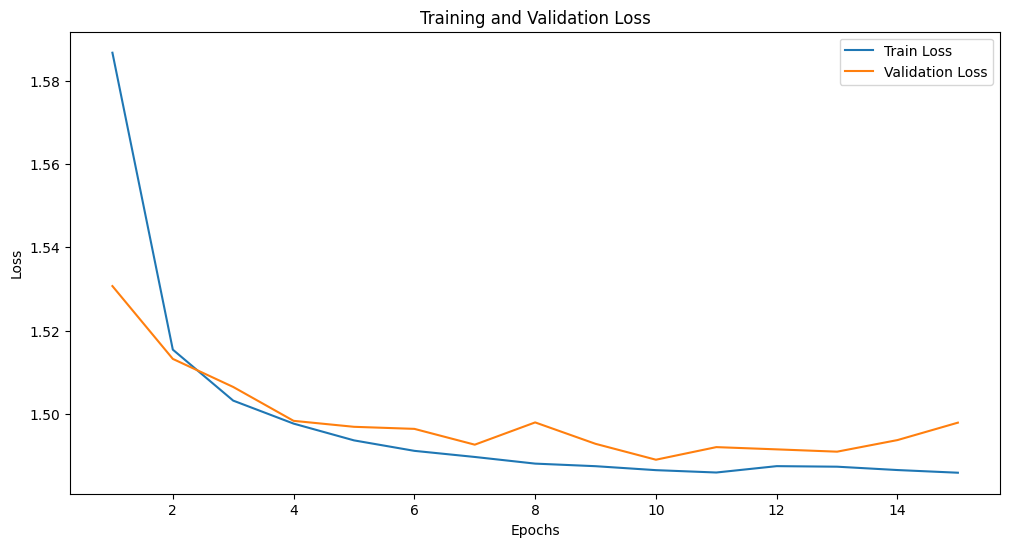

In [18]:
# Plot Training and Validation Losses
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

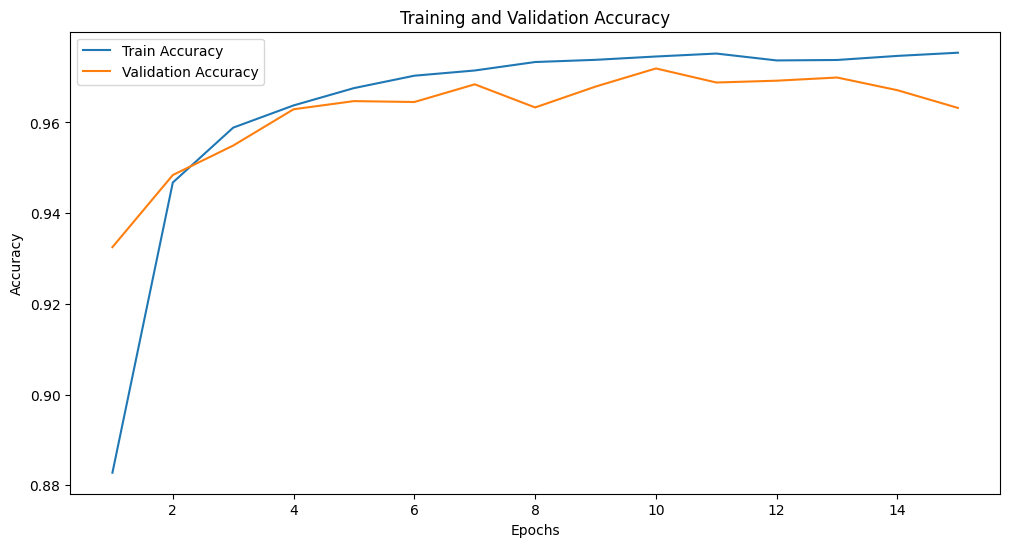

In [19]:
# Plot Training and Validation Accuracies
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

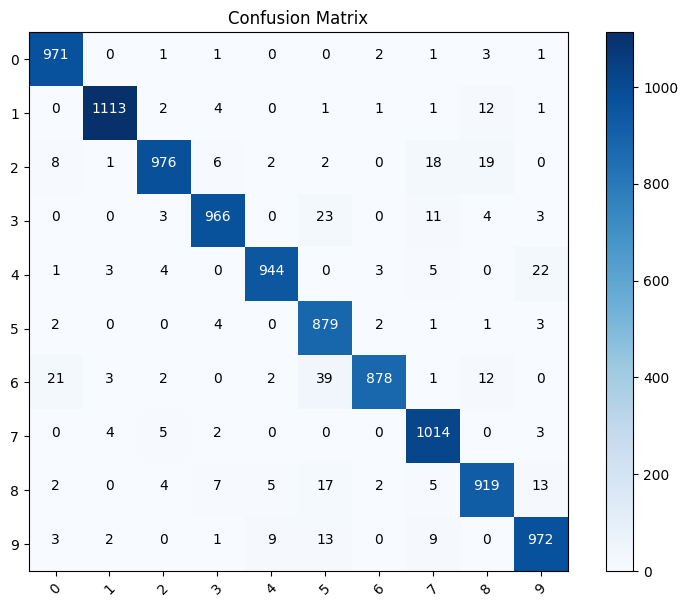

In [25]:
# Collect all predictions and true labels
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate confusion matrix
cm = confusion_matrix(all_labels, all_preds)
classes = [str(i) for i in range(output_dim)]  # List of class names

# Plot confusion matrix
plot_confusion_matrix(cm, classes)
plt.show()

# L2 Regularisation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

In [27]:
# Define dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [30]:
# Define the network
class MyNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(MyNetwork, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim1)
        self.layer2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.layer3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.output_layer = nn.Linear(hidden_dim3, output_dim)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        out1 = self.relu(self.layer1(x))
        out2 = self.relu(self.layer2(out1))
        out3 = self.relu(self.layer3(out2))
        output = self.softmax(self.output_layer(out3))
        return output


In [31]:
def train_model(model, train_dataloader, test_dataloader, criterion, optimizer, num_epochs, device):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_dataloader)
        train_accuracy = correct / total

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        val_loss, val_accuracy = evaluate_model(model, test_dataloader, criterion, device)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy * 100:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy * 100:.2f}%')

    print('Training complete.')
    return train_losses, train_accuracies, val_losses, val_accuracies

In [32]:
def evaluate_model(model, dataloader, criterion, device):
    model.eval()
    correct = 0
    total = 0
    total_loss = 0.0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total
    return avg_loss, accuracy

In [48]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

In [37]:
# Main
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [38]:
input_dim = 784
hidden_dim1 = 500
hidden_dim2 = 250
hidden_dim3 = 100
output_dim = 10
batch_size = 64
learning_rate = 0.001
num_epochs = 15
weight_decay = 0.001  # Regularization strength (alpha)

In [39]:
model = MyNetwork(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)  # Added weight_decay

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_dataloader, test_dataloader, criterion, optimizer, num_epochs, device)

Epoch [1/15], Train Loss: 1.6075, Train Accuracy: 86.76%, Val Loss: 1.5300, Val Accuracy: 93.97%
Epoch [2/15], Train Loss: 1.5334, Train Accuracy: 93.72%, Val Loss: 1.5169, Val Accuracy: 95.28%
Epoch [3/15], Train Loss: 1.5216, Train Accuracy: 94.85%, Val Loss: 1.5166, Val Accuracy: 95.36%
Epoch [4/15], Train Loss: 1.5148, Train Accuracy: 95.48%, Val Loss: 1.5100, Val Accuracy: 95.85%
Epoch [5/15], Train Loss: 1.5112, Train Accuracy: 95.86%, Val Loss: 1.5070, Val Accuracy: 96.20%
Epoch [6/15], Train Loss: 1.5086, Train Accuracy: 96.10%, Val Loss: 1.5127, Val Accuracy: 95.64%
Epoch [7/15], Train Loss: 1.5061, Train Accuracy: 96.36%, Val Loss: 1.5106, Val Accuracy: 95.85%
Epoch [8/15], Train Loss: 1.5052, Train Accuracy: 96.45%, Val Loss: 1.5093, Val Accuracy: 96.13%
Epoch [9/15], Train Loss: 1.5033, Train Accuracy: 96.62%, Val Loss: 1.5046, Val Accuracy: 96.32%
Epoch [10/15], Train Loss: 1.5028, Train Accuracy: 96.68%, Val Loss: 1.5071, Val Accuracy: 96.10%
Epoch [11/15], Train Loss: 1.

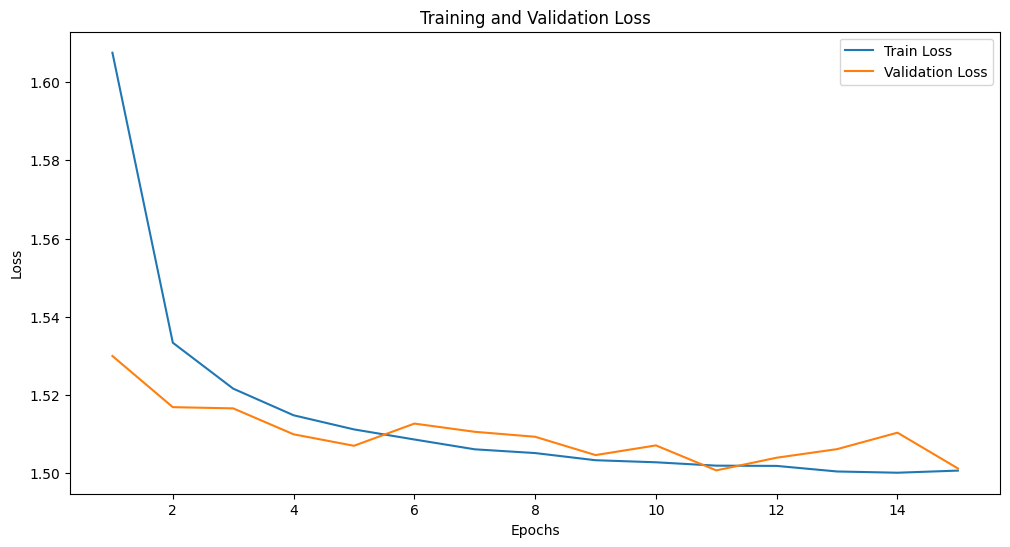

In [40]:
# Plot Training and Validation Losses
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


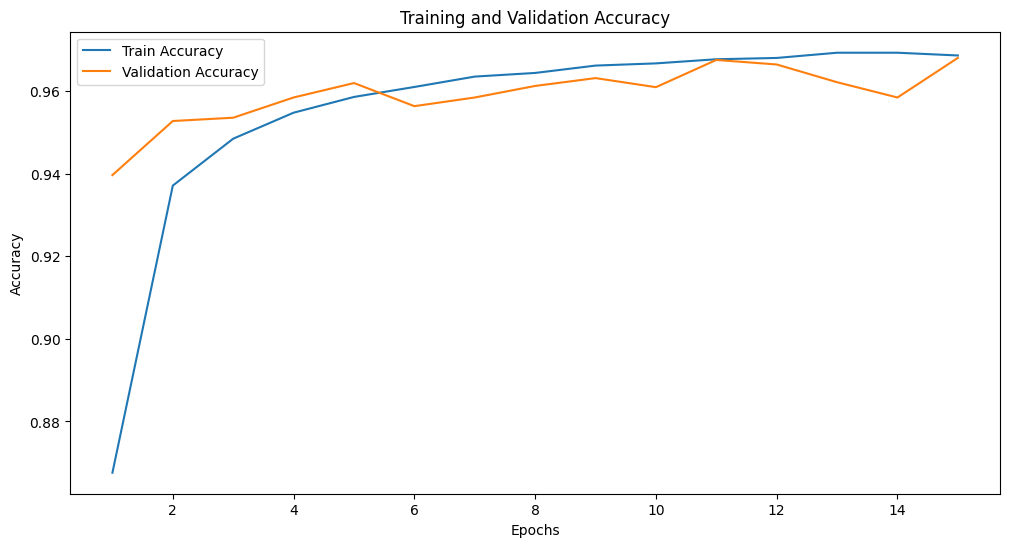

In [41]:
# Plot Training and Validation Accuracies
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [55]:
# Collect all predictions and true labels
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate confusion matrix
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:\n", cm)  # Print the confusion matrix to verify its content

# # Plot confusion matrix
# classes = [str(i) for i in range(output_dim)]  # List of class names
# plot_confusion_matrix(cm, classes)


Confusion Matrix:
 [[ 971    0    0    1    0    2    3    1    2    0]
 [   0 1119    6    2    0    0    1    3    4    0]
 [   9    0 1012    1    1    0    1    5    2    1]
 [   0    0   10  965    0   18    0   10    6    1]
 [   1    1    6    0  950    0    2    7    1   14]
 [   2    1    1    4    2  861    9    1    6    5]
 [   4    3    6    0    7    5  927    1    5    0]
 [   1    4   14    1    2    0    0 1003    0    3]
 [   4    0   15    3    3    7    4   15  921    2]
 [   6    5    0    7   10    3    1   22    3  952]]


# Regularisation effect
**Preventing Overfitting**: Regularization, such as L2 regularization (weight decay) in the code, helps prevent overfitting by discouraging the model from fitting the training data too closely.

**Generalization**: Regularization encourages models to find smoother decision boundaries, leading to better generalization to new data.

**Improved Test Accuracy**: Regularized models tend to achieve higher test accuracy, indicating their ability to generalize well.

**Stability**: Regularization adds stability to training by reducing the chances of extreme weight values.

**Hyperparameter Tuning**: Regularization introduces hyperparameters that can be tuned to find the right balance between fitting training data and preventing overfitting.

#Reference
https://nextjournal.com/gkoehler/pytorch-mnist